In [154]:
%matplotlib inline
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

In [155]:
dataset = pd.read_csv('sampleV18.csv')
x = dataset['x']
y = dataset['y']

In [156]:
def func(x, *params):

    #paramsの長さでフィッティングする関数の数を判別。
    num_func = int(len(params)/3)

    #ガウス関数にそれぞれのパラメータを挿入してy_listに追加。
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2)
        y_list.append(y)

    #y_listに入っているすべてのガウス関数を重ね合わせる。
    y_sum = np.zeros_like(x)
    for i in y_list:
        y_sum = y_sum + i

    #最後にバックグラウンドを追加。
    y_sum = y_sum + params[-1]

    return y_sum

In [157]:
def fit_plot(x, *params):
    num_func = int(len(params)/3)
    y_list = []
    for i in range(num_func):
        y = np.zeros_like(x)
        param_range = list(range(3*i,3*(i+1),1))
        amp = params[int(param_range[0])]
        ctr = params[int(param_range[1])]
        wid = params[int(param_range[2])]
        y = y + amp * np.exp( -((x - ctr)/wid)**2) + params[-1]
        y_list.append(y)
    return y_list

In [158]:
#初期値のリストを作成
#[amp,ctr,wid]
guess = []
guess.append([200, 73.20, 0.01])
guess.append([200, 73.40, 0.01])
guess.append([200, 73.50, 0.01])
guess.append([900, 73.60, 0.01])
guess.append([500, 73.65, 0.01])
guess.append([500, 73.70, 0.01])
guess.append([500, 73.75, 0.01])
guess.append([500, 73.80, 0.01])
guess.append([500, 73.87, 0.01])
guess.append([500, 73.90, 0.01])
guess.append([500, 73.95, 0.01])
guess.append([500, 73.98, 0.01])
guess.append([500, 74.00, 0.01])
guess.append([500, 74.05, 0.01])
guess.append([200, 74.10, 0.01])
guess.append([200, 74.18, 0.01])
guess.append([200, 74.38, 0.01])

#バックグラウンドの初期値
background = 20

#初期値リストの結合
guess_total = []
for i in guess:
    guess_total.extend(i)
guess_total.append(background)

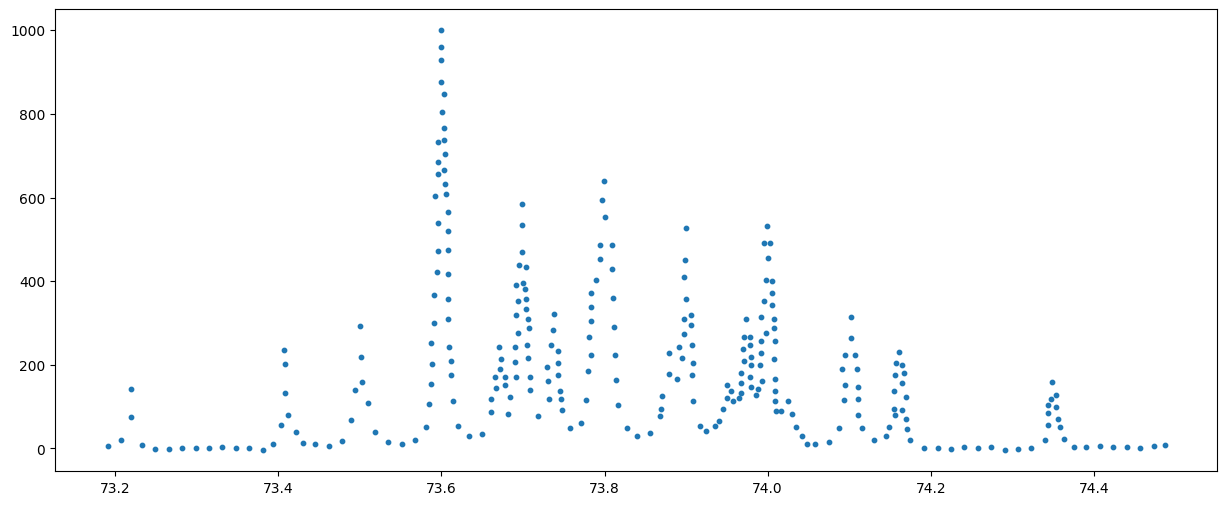

In [159]:
plt.figure(figsize=(15, 6))
plt.scatter(x, y, s=10)

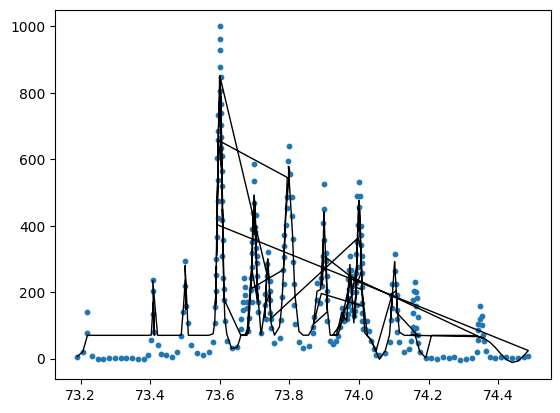

In [160]:
popt, pcov = curve_fit(func, x, y, p0=guess_total,maxfev = 50000)

fit = func(x, *popt)
plt.scatter(x, y, s=10)
plt.plot(x, fit , ls='-', c='black', lw=1)

# y_list = fit_plot(x, *popt)
# baseline = np.zeros_like(x) + popt[-1]
# for n,i in enumerate(y_list):
#     plt.fill_between(x, i, baseline, facecolor=cm.rainbow(n/len(y_list)), alpha=1)

In [161]:
# フィッティングされたパラメータを表示
print("Fitted Parameters:")
for i in range(int(len(popt) / 3)):
    print(f"Gaussian {i + 1}: Amplitude={popt[3 * i]}, Center={popt[3 * i + 1]}, Width={popt[3 * i + 2]}")
print(f"Background: {popt[-1]}")

Fitted Parameters:
Gaussian 1: Amplitude=-316.3821631540849, Center=73.19856117078507, Width=0.005976473977179676
Gaussian 2: Amplitude=164.413586231467, Center=73.40755609524219, Width=0.0018601658380268421
Gaussian 3: Amplitude=249.45469813551992, Center=73.49883911108223, Width=0.0037548486128010025
Gaussian 4: Amplitude=783.3552545823285, Center=73.60036420017012, Width=0.008587571320492484
Gaussian 5: Amplitude=-377.35003960837105, Center=73.64197564760457, Width=0.005428587429518325
Gaussian 6: Amplitude=422.6164378080959, Center=73.6988765910334, Width=0.008392946113147377
Gaussian 7: Amplitude=230.7134183186119, Center=73.7381196418342, Width=0.007001783588293562
Gaussian 8: Amplitude=510.2724469025867, Center=73.79798972493936, Width=0.015249330472782022
Gaussian 9: Amplitude=157.90731992312908, Center=73.88441181036337, Width=0.012246483029469757
Gaussian 10: Amplitude=387.4967684226958, Center=73.90166552848014, Width=0.005539106146537959
Gaussian 11: Amplitude=77.7757980050